In [1]:
import keras
keras.__version__

import os, shutil

base_dir = 'fashion_data'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

ClothesList = ['bottom_jean_dark_plain', 'bottom_jean_dark_ripped', 'bottom_jean_light_plain', 'bottom_jean_light_ripped',
             'bottom_pants_black_etc', 'bottom_pants_black_plain', 'bottom_pants_brown_etc',
             'bottom_pants_brown_plain', 'bottom_pants_green_etc', 'bottom_pants_green_plain',
             'bottom_pants_grey_etc', 'bottom_pants_grey_plain', 'bottom_pants_white_etc',
             'bottom_pants_white_plain']

## train 데이터로 join
for cl in ClothesList :
    globals()['train_{}'.format(cl)] = os.path.join(train_dir, cl)
    
## validation 데이터로 join
for cl in ClothesList :
    globals()['validation_{}'.format(cl)] = os.path.join(validation_dir, cl)
    
## test 데이터로 join
for cl in ClothesList :
    globals()['test_{}'.format(cl)] = os.path.join(test_dir, cl)

Using TensorFlow backend.


In [2]:
## 모델 생성
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3))

from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = True
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

c:\users\82104\anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


conv_base를 동결하기 전 훈련되는 가중치의 수: 216
conv_base를 동결한 후 훈련되는 가중치의 수: 216


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 830 images belonging to 14 classes.
Found 280 images belonging to 14 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 - 80s - loss: 1.0956 - acc: 0.6457 - val_loss: 1.1562 - val_acc: 0.6141
Epoch 2/100
 - 70s - loss: 0.4031 - acc: 0.8593 - val_loss: 0.9402 - val_acc: 0.7197
Epoch 3/100
 - 70s - loss: 0.2429 - acc: 0.9147 - val_loss: 0.9822 - val_acc: 0.7397
Epoch 4/100
 - 70s - loss: 0.1831 - acc: 0.9354 - val_loss: 0.9473 - val_acc: 0.7332
Epoch 5/100
 - 70s - loss: 0.1417 - acc: 0.9479 - val_loss: 1.0845 - val_acc: 0.7538
Epoch 6/100
 - 70s - loss: 0.1126 - acc: 0.9606 - val_loss: 1.0306 - val_acc: 0.7887
Epoch 7/100
 - 70s - loss: 0.0965 - acc: 0.9664 - val_loss: 1.1908 - val_acc: 0.7795
Epoch 8/100
 - 70s - loss: 0.0810 - acc: 0.9729 - val_loss: 1.1471 - val_acc: 0.7816
Epoch 9/100
 - 70s - loss: 0.0632 - acc: 0.9793 - val_loss: 1.1524 - val_acc: 0.7983
Epoch 10/100
 - 70s - loss: 0.0625 - acc: 0.9789 - val_l

 - 71s - loss: 0.0086 - acc: 0.9978 - val_loss: 1.8910 - val_acc: 0.8170
Epoch 90/100
 - 71s - loss: 0.0108 - acc: 0.9966 - val_loss: 1.8993 - val_acc: 0.8215
Epoch 91/100
 - 71s - loss: 0.0055 - acc: 0.9978 - val_loss: 1.9269 - val_acc: 0.8038
Epoch 92/100
 - 71s - loss: 0.0148 - acc: 0.9966 - val_loss: 1.9999 - val_acc: 0.8138
Epoch 93/100
 - 71s - loss: 0.0093 - acc: 0.9975 - val_loss: 1.9938 - val_acc: 0.8077
Epoch 94/100
 - 71s - loss: 0.0074 - acc: 0.9977 - val_loss: 2.0759 - val_acc: 0.7990
Epoch 95/100
 - 71s - loss: 0.0115 - acc: 0.9967 - val_loss: 1.9418 - val_acc: 0.8160
Epoch 96/100
 - 71s - loss: 0.0116 - acc: 0.9969 - val_loss: 1.9954 - val_acc: 0.7970
Epoch 97/100
 - 71s - loss: 0.0103 - acc: 0.9978 - val_loss: 2.0284 - val_acc: 0.8071
Epoch 98/100
 - 71s - loss: 0.0070 - acc: 0.9978 - val_loss: 2.0143 - val_acc: 0.8022
Epoch 99/100
 - 71s - loss: 0.0108 - acc: 0.9977 - val_loss: 2.0711 - val_acc: 0.8022
Epoch 100/100
 - 71s - loss: 0.0127 - acc: 0.9970 - val_loss: 2.086

In [4]:
model.save('1201_OnlyFeature3.h5')

In [5]:
# conv_base.trainable = True

In [6]:
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [7]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-3),
#               metrics=['acc'])

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=100,
#       validation_data=validation_generator,
#       validation_steps=50)

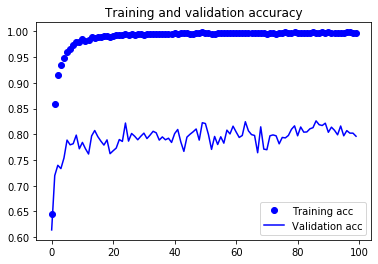

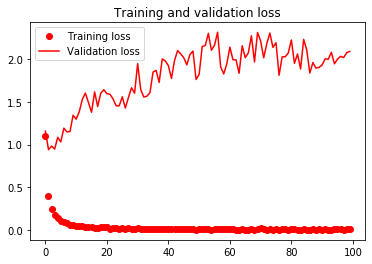

In [12]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 140 images belonging to 14 classes.
test acc: 0.7640000021457672


In [10]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation